<a href="https://colab.research.google.com/github/svlataki/DataChallenge/blob/main/BERT_unsucessful_attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import csv
import re
import zipfile
from io import BytesIO

def clean_str(line):
    clean_line = re.sub(r'http\S+', '', line)

    return clean_line

counter = 0
# Read training data
train_domains = list()
y_train = list()
with open("/content/gdrive/My Drive/train.txt", 'r') as f:
    for line in f:
        l = line.split(',')
        train_domains.append(l[0])
        y_train.append(l[1][:-1])

# Read test data
test_domains = list()
with open("/content/gdrive/My Drive/test.txt", 'r') as f:
    for line in f:
        l = line.split(',')
        test_domains.append(l[0])

# Read textual content of webpages of domain names
text = dict()
with zipfile.ZipFile('/content/gdrive/My Drive/domains.zip', "r") as zfile:
    for filename in zfile.namelist():
        if re.search(r'\.zip$', filename) is not None:
            zfiledata = BytesIO(zfile.read(filename))
            with zipfile.ZipFile(zfiledata) as zfile2:
                text[filename[:-4]] = ''
                for name2 in zfile2.namelist():
                    file = zfile2.read(name2)
                    text[filename[:-4]] += file.decode('utf16') + ' '

# Retrieve textual content of domain names of the training set
train_data = list()
for domain in train_domains:
    if domain in text:
        train_data.append(clean_str(text[domain][0:100000]))
    else:
        train_data.append('')

# Retrieve textual content of domain names of the test set
test_data = list()
for domain in test_domains:
    if domain in text:
        test_data.append(clean_str(text[domain][0:100000]))
    else:
        test_data.append('')

# To reduce memory 
text = None

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_data,\
                                                  y_train, test_size=0.2, stratify=y_train, random_state=42)

X_train=np.asarray(X_train)

y_train=np.asarray(y_train).astype(np.int)

X_val=np.asarray(X_val)

y_val=np.asarray(y_val).astype(np.int)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprec

In [ ]:

X_test =np.asarray(test_data)

In [ ]:
X_train

array([' *#*Άρθα με επισήμανση νυχτερινη\nΠέμπτη Ιούλιος\nΈνας πολύτιμος οδηγός για την Βαλέτα με τα σημαντικότερα αξιοθέατα και τα καλύτερα ξενοδοχεία εστιατόρια και νυχτερινά μαγαζιά\nΓιατί να την επισκεφθείτε\nΠρώτα απ όλα για τα μοναδικά ιστορικά αξιοθέατα της αλλά και για τον γαλανό ουρανό τις γαλάζιες παραλίες και τις υπέροχες μεσογειακές λιχουδιές\nΗ Μάλτα διαθέτει τα περισσότερα ιστορικά αξιοθέατα από οποιαδήποτε άλλη χώρα από μοναδικούς Νεολιθικούς Ναούς παλαιότερους και από τις Αρχαίες Πυραμίδες έως το Τάγμα των Ιωαννιτών Ιπποτών δικαιολογημένα γνωστό ως Οι Ιππότες της Μάλτας Η Βαλέτα η μικρή γοητευτική πρωτεύουσα της η οποία ανακηρύχθηκε Πόλη Παγκόσμιας Πολιτιστικής Κληρονομιάς και Ευρωπαϊκή Πολιτιστική Πρωτεύουσα για το αποτελεί το ιδανικό μέρος για να περιηγηθεί κανείς απολαμβάνοντας την ιστορία και τον ήλιο της και σημαντικό σημείο για περιήγηση στα αξιοθέατα κατά μήκος του νησιού\nΧτισμένη σε μια χερσόνησο η Βαλέτα βρέχεται από τρεις πλευρές από θάλασσα συμπεριλαμβανομέν

In [ ]:
!pip install unicodedata2
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 467 kB 9.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 8.3 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 596 kB 50.7 MB/s 
     |████████████████████████████████| 6.6 MB 40.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import numpy as np
import tensorflow as tf
import unicodedata2
from nltk.stem import WordNetLemmatizer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from transformers import (AutoModel, AutoTokenizer,
                          TFBertForSequenceClassification, TFBertModel,BertConfig)

In [ ]:
def strip_accents_and_lowercase(s):
   return ''.join(c for c in unicodedata2.normalize('NFD', s)
                  if unicodedata2.category(c) != 'Mn').lower()



def proceess_greek(x_train, x_valid, x_test):
    x_train_new = []
    x_valid_new = []
    x_test_new = []

    for accented_string in x_train:
        unaccented_string = strip_accents_and_lowercase(accented_string)
        x_train_new.append(unaccented_string)

    for accented_string in x_valid:
        unaccented_string = strip_accents_and_lowercase(accented_string)
        x_valid_new.append(unaccented_string)

    for accented_string in x_test:
        unaccented_string = strip_accents_and_lowercase(accented_string)
        x_test_new.append(unaccented_string)
    
    return x_train_new,x_valid_new, x_test_new

In [ ]:
x_train_processed,x_valid_processed, x_test_processed = proceess_greek(X_train,X_val,X_train)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("nlpaueb/bert-base-greek-uncased-v1", model_max_length=512)

x_train_dict = tokenizer.batch_encode_plus(x_train_processed,add_special_tokens = True,max_length =255,padding = 'max_length',truncation=True, return_token_type_ids=True, return_attention_mask=True)
train_input_ids=x_train_dict['input_ids']
train_attention_masks = x_train_dict['attention_mask']

x_valid_dict = tokenizer.batch_encode_plus(x_valid_processed,add_special_tokens = True,max_length =255,padding = 'max_length',truncation=True, return_token_type_ids=True, return_attention_mask=True)
valid_input_ids=x_valid_dict['input_ids']
valid_attention_masks = x_valid_dict['attention_mask']

x_test_dict = tokenizer.batch_encode_plus(x_test_processed,add_special_tokens = True,max_length =255,padding = 'max_length',truncation=True, return_token_type_ids=True, return_attention_mask=True)
test_input_ids=x_test_dict ['input_ids']
test_attention_masks = x_test_dict['attention_mask']

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/459 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/518k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
X_train[0]

' *#*Άρθα με επισήμανση νυχτερινη\nΠέμπτη Ιούλιος\nΈνας πολύτιμος οδηγός για την Βαλέτα με τα σημαντικότερα αξιοθέατα και τα καλύτερα ξενοδοχεία εστιατόρια και νυχτερινά μαγαζιά\nΓιατί να την επισκεφθείτε\nΠρώτα απ όλα για τα μοναδικά ιστορικά αξιοθέατα της αλλά και για τον γαλανό ουρανό τις γαλάζιες παραλίες και τις υπέροχες μεσογειακές λιχουδιές\nΗ Μάλτα διαθέτει τα περισσότερα ιστορικά αξιοθέατα από οποιαδήποτε άλλη χώρα από μοναδικούς Νεολιθικούς Ναούς παλαιότερους και από τις Αρχαίες Πυραμίδες έως το Τάγμα των Ιωαννιτών Ιπποτών δικαιολογημένα γνωστό ως Οι Ιππότες της Μάλτας Η Βαλέτα η μικρή γοητευτική πρωτεύουσα της η οποία ανακηρύχθηκε Πόλη Παγκόσμιας Πολιτιστικής Κληρονομιάς και Ευρωπαϊκή Πολιτιστική Πρωτεύουσα για το αποτελεί το ιδανικό μέρος για να περιηγηθεί κανείς απολαμβάνοντας την ιστορία και τον ήλιο της και σημαντικό σημείο για περιήγηση στα αξιοθέατα κατά μήκος του νησιού\nΧτισμένη σε μια χερσόνησο η Βαλέτα βρέχεται από τρεις πλευρές από θάλασσα συμπεριλαμβανομένου του 

In [ ]:
x_train_processed[0]

' *#*αρθα με επισημανση νυχτερινη\nπεμπτη ιουλιος\nενας πολυτιμος οδηγος για την βαλετα με τα σημαντικοτερα αξιοθεατα και τα καλυτερα ξενοδοχεια εστιατορια και νυχτερινα μαγαζια\nγιατι να την επισκεφθειτε\nπρωτα απ ολα για τα μοναδικα ιστορικα αξιοθεατα της αλλα και για τον γαλανο ουρανο τις γαλαζιες παραλιες και τις υπεροχες μεσογειακες λιχουδιες\nη μαλτα διαθετει τα περισσοτερα ιστορικα αξιοθεατα απο οποιαδηποτε αλλη χωρα απο μοναδικους νεολιθικους ναους παλαιοτερους και απο τις αρχαιες πυραμιδες εως το ταγμα των ιωαννιτων ιπποτων δικαιολογημενα γνωστο ως οι ιπποτες της μαλτας η βαλετα η μικρη γοητευτικη πρωτευουσα της η οποια ανακηρυχθηκε πολη παγκοσμιας πολιτιστικης κληρονομιας και ευρωπαικη πολιτιστικη πρωτευουσα για το αποτελει το ιδανικο μερος για να περιηγηθει κανεις απολαμβανοντας την ιστορια και τον ηλιο της και σημαντικο σημειο για περιηγηση στα αξιοθεατα κατα μηκος του νησιου\nχτισμενη σε μια χερσονησο η βαλετα βρεχεται απο τρεις πλευρες απο θαλασσα συμπεριλαμβανομενου του 

In [ ]:

def create_model3():
    model_ = TFBertModel.from_pretrained("nlpaueb/bert-base-greek-uncased-v1")

    input_ids = tf.keras.Input(shape=(255,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(255,),dtype='int32')
    
    embedding_layer = model_(input_ids, attention_mask=attention_masks)[0] 

    X = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(embedding_layer)

    X = tf.keras.layers.GlobalMaxPool1D()(X)
    X = tf.keras.layers.Dense(50, activation='relu')(X)
    X = tf.keras.layers.Dropout(0.2)(X)
    X = tf.keras.layers.Dense(50, activation='relu')(X)
    X = tf.keras.layers.Dropout(0.2)(X)
    X = tf.keras.layers.Dense(10, activation='softmax')(X)

    model = tf.keras.Model(inputs=[input_ids, attention_masks], outputs = X)
    
    for layer in model.layers[:3]:
        layer.trainable = True
    return model

In [ ]:
def create_model2():
    model_ = TFBertModel.from_pretrained("nlpaueb/bert-base-greek-uncased-v1")

    input_ids = tf.keras.Input(shape=(255,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(255,),dtype='int32')
    
    output = model_(input_ids,attention_masks)
    output = output[0]      # this is inline in config.output_hidden_states as we want only the top head
    
    output = output[:,0,:]  #  We are only interested in <cls> or classification token of the model which can be extracted
                            #  using the slice operation. Now we have 2D data and build the network as one desired.
                            #  While converting 3D data to 2D we may miss on valuable info.
    
    output = tf.keras.layers.Dense(64,activation='relu')(output)
    # output = tf.keras.layers.Dropout(0.2)(output)
    # output = tf.keras.layers.Dense(32,activation='relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(10,activation='softmax')(output)
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    
    
    for layer in model.layers[:3]:
        layer.trainable = False
    return model

In [ ]:
from sklearn.utils import class_weight


callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=8)

#model = create_model2()
model = create_model3() #TFBertForSequenceClassification.from_pretrained("nlpaueb/bert-base-greek-uncased-v1",num_labels=10)
print(model.summary())
y_train_labels = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_valid_labels = tf.keras.utils.to_categorical(y_val, num_classes=10)


train_input_ids = np.array(train_input_ids)
train_attention_masks = np.array(train_attention_masks)

valid_input_ids = np.array(valid_input_ids)
valid_attention_masks = np.array(valid_attention_masks)

test_input_ids = np.array(test_input_ids)
test_attention_masks = np.array(test_attention_masks)

y_train = np.array(y_train)
y_val = np.array(y_val)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


class_weights = class_weight.compute_class_weight('balanced',classes = np.unique(y_train),y = y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

history=model.fit(
    [train_input_ids, train_attention_masks],
    y_train_labels,
    batch_size=12,
    epochs=30,
    validation_data=([valid_input_ids, valid_attention_masks],y_valid_labels),
    class_weight = class_weights_dict,
    callbacks=[callback])


y_pred = model.predict([valid_input_ids, valid_attention_masks])


Some layers from the model checkpoint at nlpaueb/bert-base-greek-uncased-v1 were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at nlpaueb/bert-base-greek-uncased-v1.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 255)]        0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 255)]        0           []                               
                                                                                                  
 tf_bert_model_5 (TFBertModel)  TFBaseModelOutputWi  112921344   ['input_11[0][0]',               
                                thPoolingAndCrossAt               'input_12[0][0]']               
                                tentions(last_hidde                                               
                                n_state=(None, 255,                                         

84/84 [==============================] - 314s 3s/step - loss: 2.3429 - accuracy: 0.0636 - val_loss: 2.3390 - val_accuracy: 0.0437
Epoch 2/30
84/84 [==============================] - 280s 3s/step - loss: 2.3226 - accuracy: 0.1123 - val_loss: 2.2726 - val_accuracy: 0.1389
Epoch 3/30
84/84 [==============================] - 278s 3s/step - loss: 2.3120 - accuracy: 0.0865 - val_loss: 2.3163 - val_accuracy: 0.1111
Epoch 4/30
84/84 [==============================] - 279s 3s/step - loss: 2.3058 - accuracy: 0.0686 - val_loss: 2.3091 - val_accuracy: 0.0317
Epoch 5/30
84/84 [==============================] - 277s 3s/step - loss: 2.3039 - accuracy: 0.0964 - val_loss: 2.2991 - val_accuracy: 0.0397
Epoch 6/30
84/84 [==============================] - 278s 3s/step - loss: 2.3036 - accuracy: 0.1660 - val_loss: 2.3039 - val_accuracy: 0.0397
Epoch 7/30
84/84 [==============================] - 276s 3s/step - loss: 2.3050 - accuracy: 0.0885 - val_loss: 2.2993 - val_accuracy: 0.0397
Epoch 8/30
84/84 [======

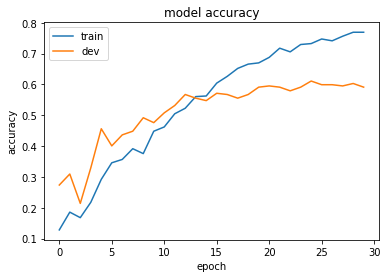

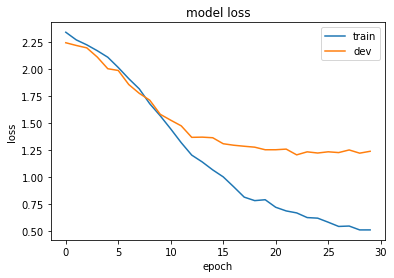

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper right')
plt.show()


In [ ]:
y_valid_pred = model.predict([valid_input_ids, valid_attention_masks])

In [ ]:
from sklearn.metrics import classification_report

y_valid_pred = model.predict([valid_input_ids, valid_attention_masks])
print(classification_report(y_val, np.argmax(y_valid_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74        67
           1       0.38      0.75      0.51        28
           2       0.71      0.49      0.58        35
           3       0.68      0.61      0.64        69
           4       0.60      0.82      0.69        11
           5       0.33      0.30      0.32        10
           6       0.30      0.21      0.25        14
           7       0.75      0.50      0.60         6
           8       0.00      0.00      0.00         4
           9       0.33      0.25      0.29         8

    accuracy                           0.59       252
   macro avg       0.48      0.47      0.46       252
weighted avg       0.61      0.59      0.59       252



In [ ]:
y_pred = model.predict([test_input_ids, test_attention_masks])


# Write predictions to a file
with open('sample_submission_bert.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    lst = list()
    for i in range(10):
        lst.append('class_'+str(i))
    lst.insert(0, "domain_name")
    writer.writerow(lst)
    for i,test_domain in enumerate(test_domains):
        lst = y_pred[i,:].tolist()
        lst.insert(0, test_domain)
        writer.writerow(lst)